<a href="https://colab.research.google.com/github/leureva/mbd-data-mining/blob/main/Activity6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [100]:
path = "https://raw.githubusercontent.com/leureva/mbd-data-mining/main/Activity5_antropometria-dataset-1.csv"

In [101]:
df = pd.read_csv(path)
df

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.40,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.10,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.00,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.50,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.00,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18635,300116,2,30,VERACRUZ DE IGNACIO DE LA LLAVE,2,73,11,75.80,1,141.15,...,18:00,1,18:05,1,R3002,5,3,1,7615.607749,305
18636,40253,1,4,CAMPECHE,2,75,0,69.40,1,144.80,...,18:40,1,18:40,1,M0408,5,3,1,195.314670,45
18637,301099,1,30,VERACRUZ DE IGNACIO DE LA LLAVE,1,86,7,46.75,2,149.20,...,8:00,3,23:00,1,M3024,2,1,2,1758.912979,302
18638,250801,1,25,SINALOA,2,72,7,59.05,2,142.50,...,6:02,3,6:02,1,M2512,3,2,1,2354.581350,253


In [102]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [103]:
df_sistol = df["sistol"]
df_diastol = df["diastol"]

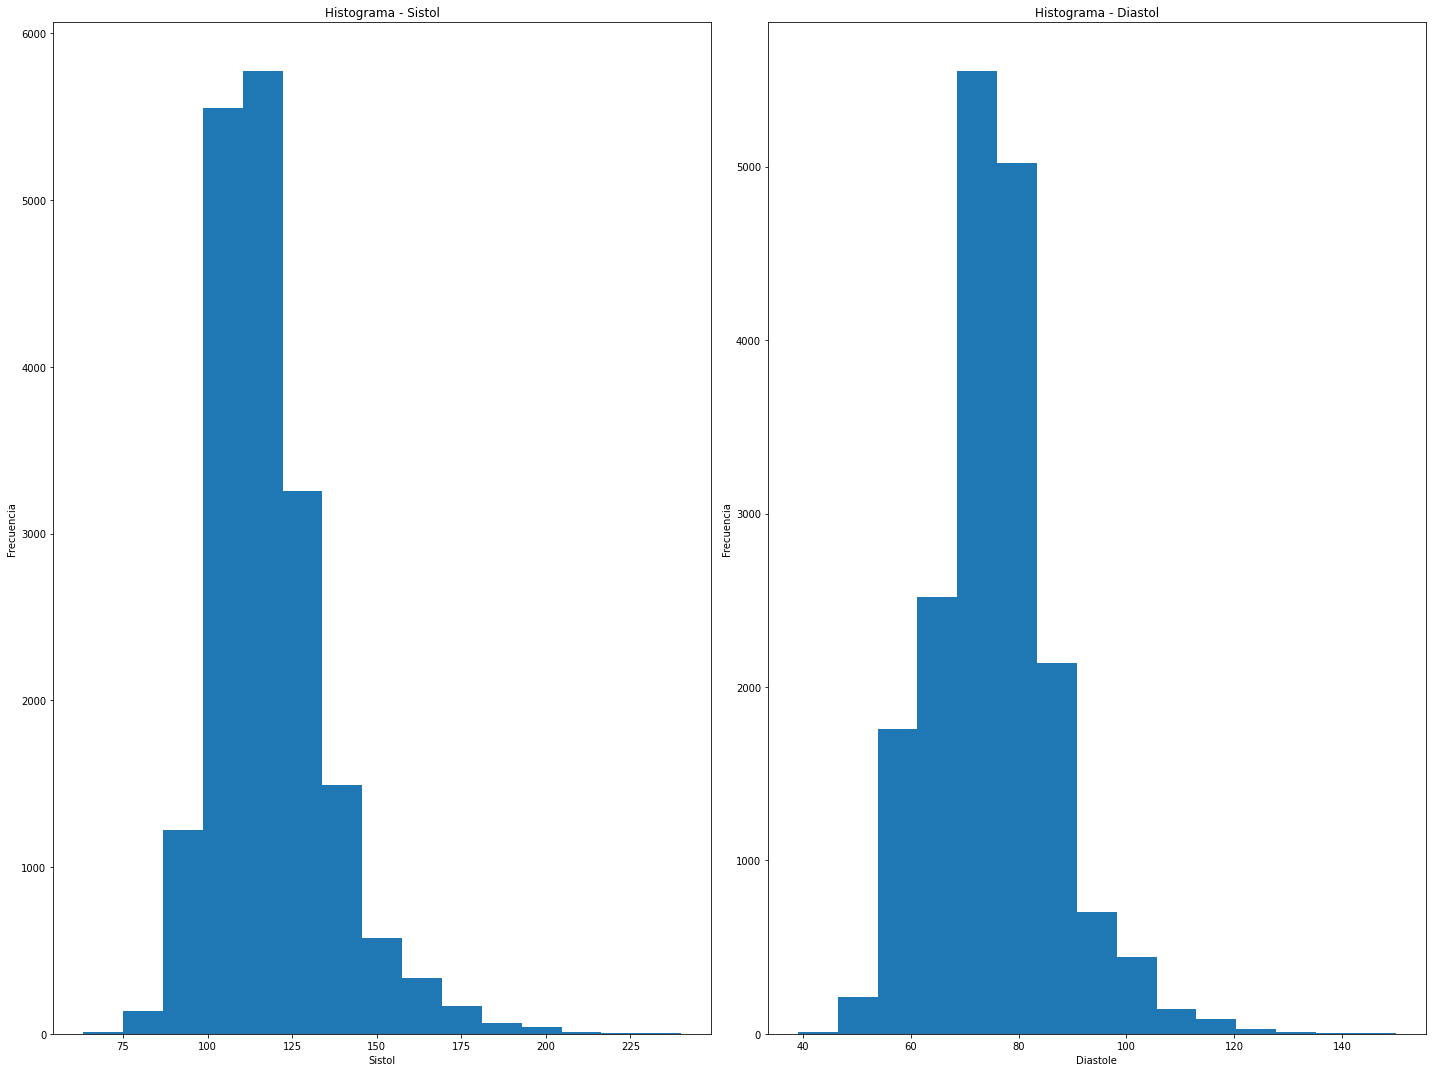

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(20, 15))

axs[0].hist(df_sistol, bins=15)
axs[1].hist(df_diastol, bins=15)

axs[0].set_xlabel("Sistol")
axs[0].set_ylabel("Frecuencia")
axs[0].set_title("Histograma - Sistol")
axs[1].set_xlabel("Diastole")
axs[1].set_ylabel("Frecuencia")
axs[1].set_title("Histograma - Diastol")

plt.show()

In [105]:
df_peso = df["peso"]
df_cintura = df["cintura"]

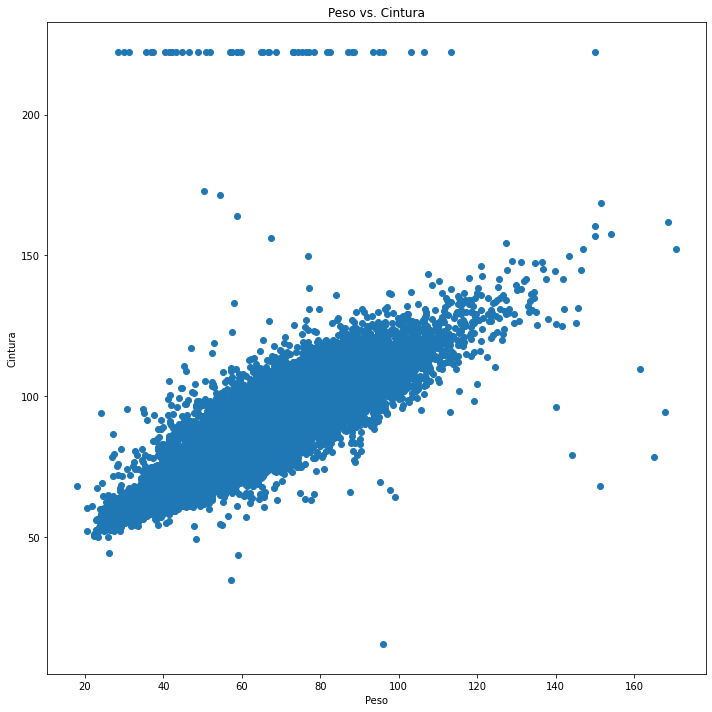

In [106]:
plt.figure(figsize=(10, 10))

plt.scatter(df_peso, df_cintura)

plt.xlabel("Peso")
plt.ylabel("Cintura")
plt.title("Peso vs. Cintura")

plt.show()

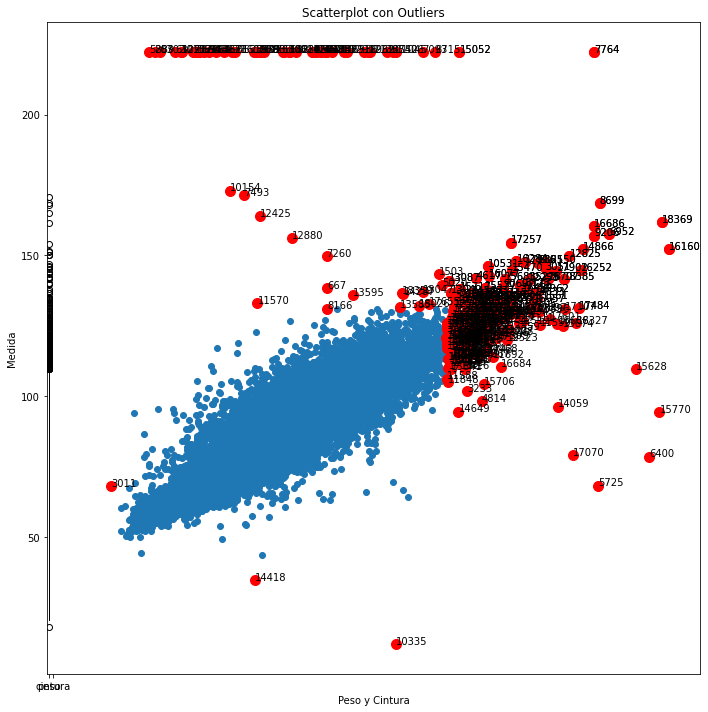

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df_peso, df_cintura)
ax.boxplot([df_peso, df_cintura], labels=["peso", "cintura"], whis=1.5)

ax.set_xlabel("Peso y Cintura")
ax.set_ylabel("Medida")
ax.set_title("Scatterplot con Outliers")

outliers = pd.concat([df[df_peso < df_peso.quantile(0.25) - 1.5*(df_peso.quantile(0.75)-df_peso.quantile(0.25))],
                      df[df_peso > df_peso.quantile(0.75) + 1.5*(df_peso.quantile(0.75)-df_peso.quantile(0.25))],
                      df[df_cintura < df_cintura.quantile(0.25) - 1.5*(df_cintura.quantile(0.75)-df_cintura.quantile(0.25))],
                      df[df_cintura > df_cintura.quantile(0.75) + 1.5*(df_cintura.quantile(0.75)-df_cintura.quantile(0.25))]])
outlier_labels = list(outliers.index)
ax.scatter(outliers["peso"], outliers["cintura"], c="r", marker="o", s=100)
for i, txt in enumerate(outlier_labels):
    ax.annotate(txt, (outliers["peso"].iloc[i], outliers["cintura"].iloc[i]))

plt.show()

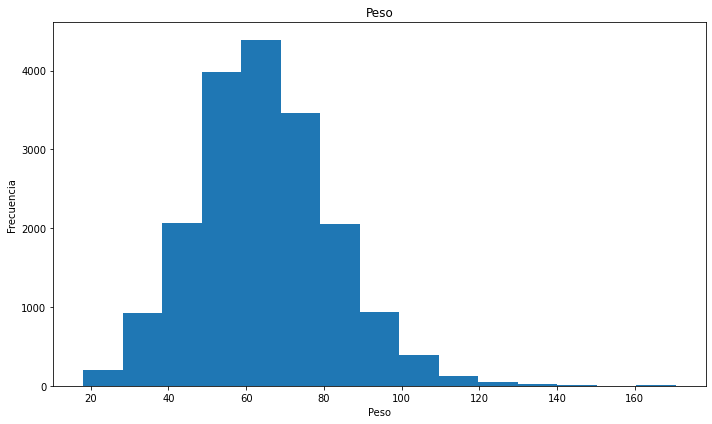

In [108]:
plt.figure(figsize=(10, 6))

plt.hist(df_peso, bins=15)

plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.title("Peso")

plt.show()

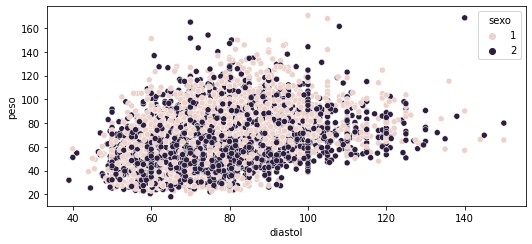

In [109]:
sns.scatterplot(data=df, x="diastol", y="peso", hue="sexo")

plt.show()

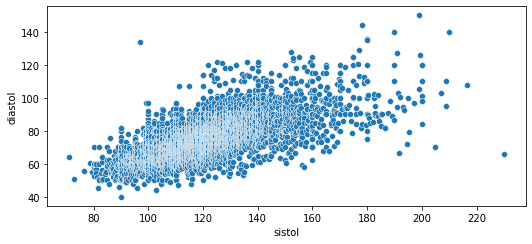

In [110]:
df_male = df[df["sexo"] == 1]

sns.scatterplot(data=df_male, x="sistol", y="diastol")

plt.show()

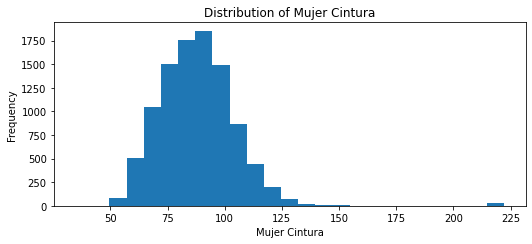

In [111]:
mujer_cintura = df[df["sexo"] == 2]["cintura"]

plt.hist(mujer_cintura, bins=25)

plt.xlabel("Mujer Cintura")
plt.ylabel("Frequency")
plt.title("Distribution of Mujer Cintura")

plt.show()